In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

train = pd.read_csv("Invistico_Airline.csv")

In [4]:
train.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
train.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
train.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
train.describe(include='O')

,satisfaction,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [9]:
train.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [10]:
# 결측값 처리
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].median())

In [11]:
train.satisfaction.unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [12]:
train.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
train['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [14]:
train["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [15]:
train.Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [16]:
satisfied_map = { "satisfied":1, "dissatisfied":0 } # satisfied : True, Dissatisfied : False
train['satisfaction'] = train['satisfaction'].map(satisfied_map)

In [17]:
train.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [18]:
gender_map = { 'Female':0, 'Male':1 }
ctype_map = { 'Loyal Customer':1, 'disloyal Customer':0 }
ttype_map = { 'Personal Travel':0, 'Business travel':1 }
class_map = { 'Business':3 , 'Eco Plus':2, 'Eco':1 }

train['Gender'] = train['Gender'].map(gender_map)
train['Customer Type'] = train['Customer Type'].map(ctype_map)
train['Type of Travel'] = train['Type of Travel'].map(ttype_map)
train['Class'] = train['Class'].map(class_map)

<AxesSubplot:>

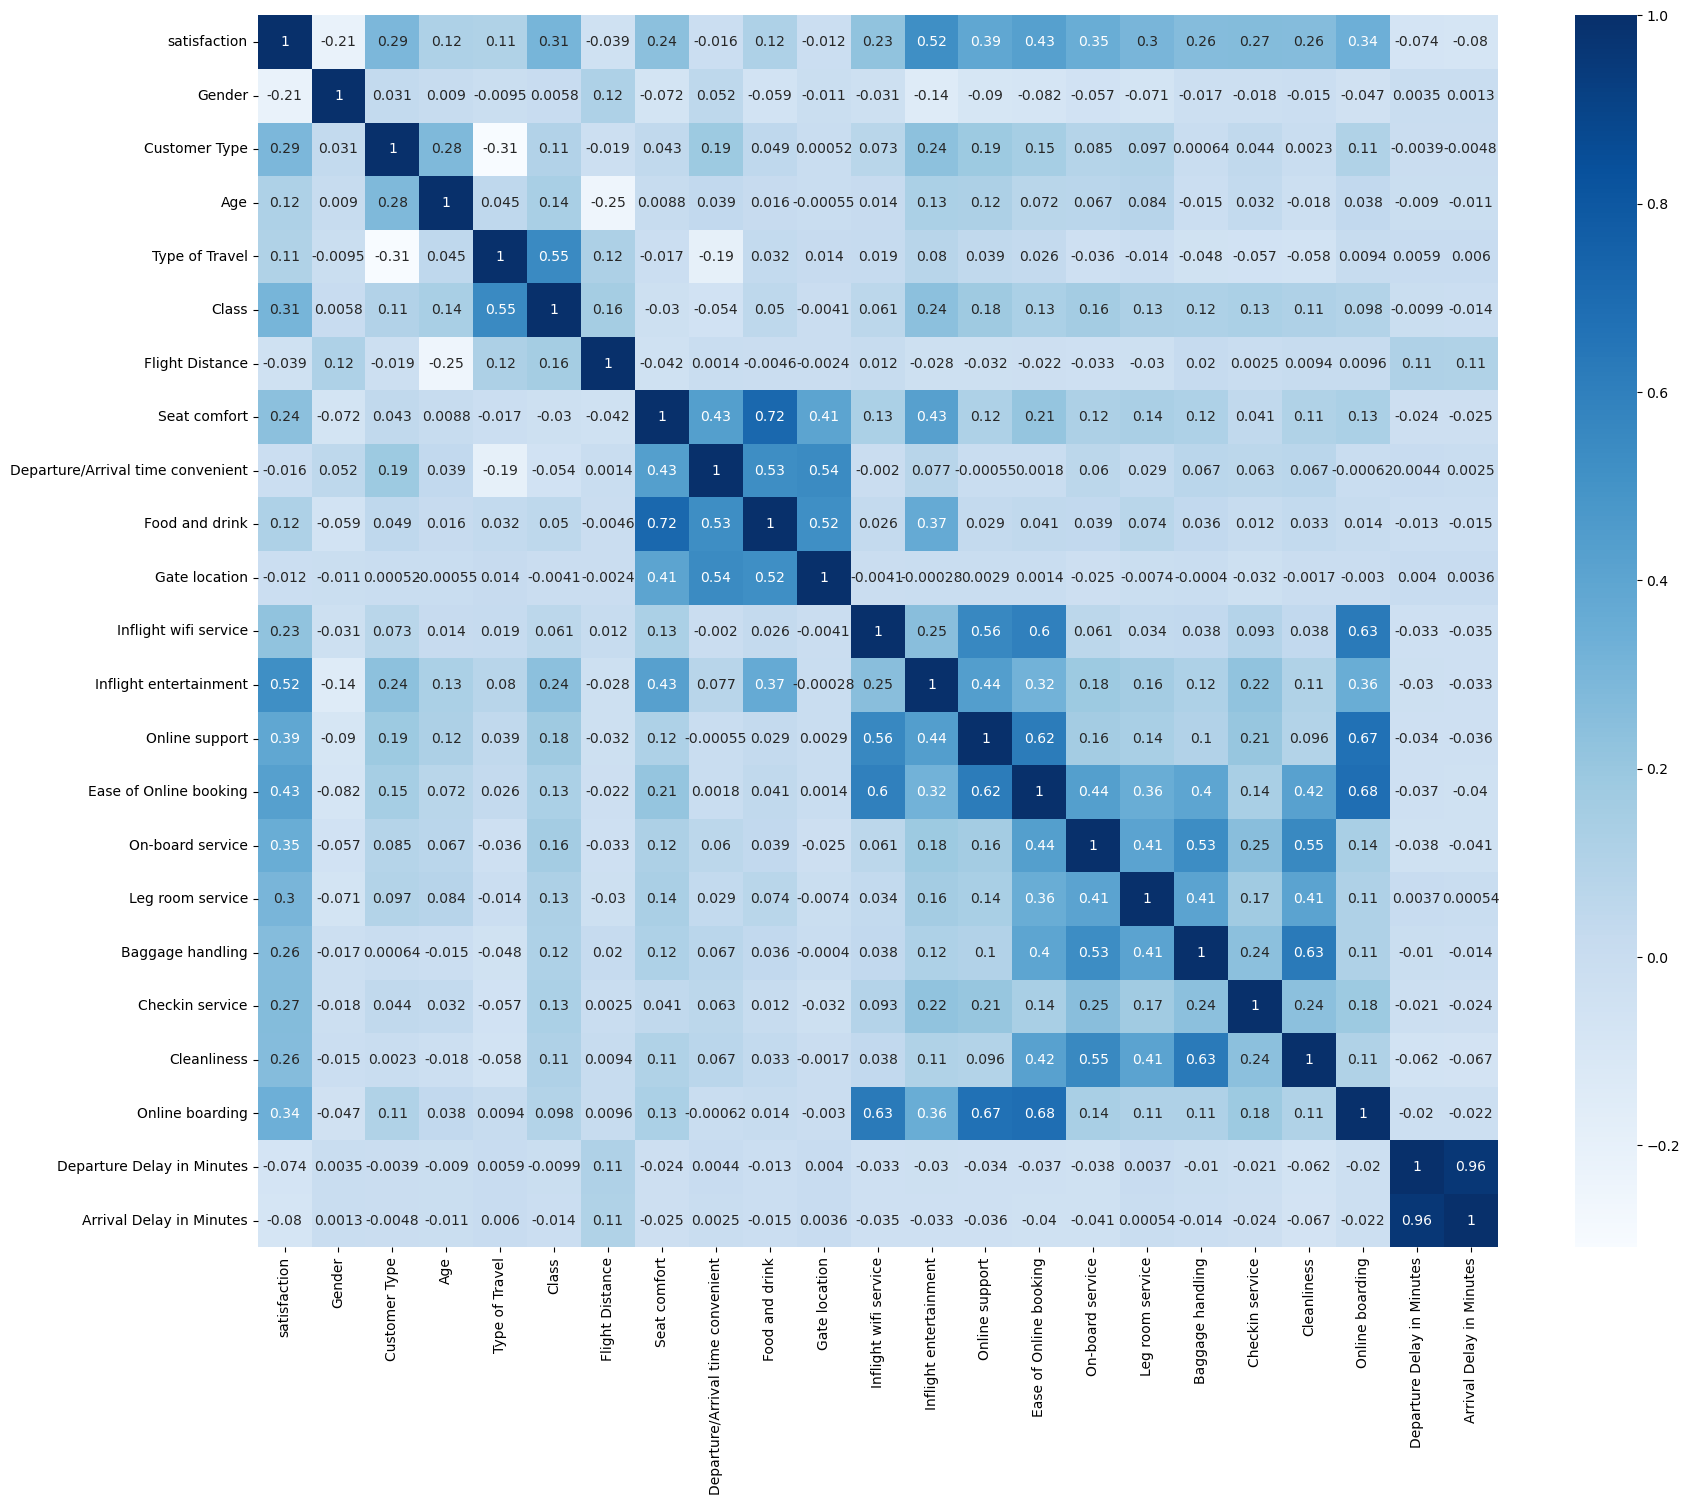

In [19]:
import seaborn as sns
plt.figure(figsize=(20, 16))
sns.heatmap(train.corr(), annot=True, cmap='Blues')

In [20]:
X = train.drop(columns='satisfaction')
Y = train['satisfaction']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_train)
acc = accuracy_score(Y_train, pred)
acc

0.7599418694179242

In [24]:
pred = lr.predict(X_test)
acc = accuracy_score(Y_test, pred)
acc

0.7600477363720357

In [25]:
X_train.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5276
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            449
Arrival Delay in Minutes              456
dtype: int64

In [27]:
category_col = X_train.columns.to_list()

In [35]:
len(category_col)

18

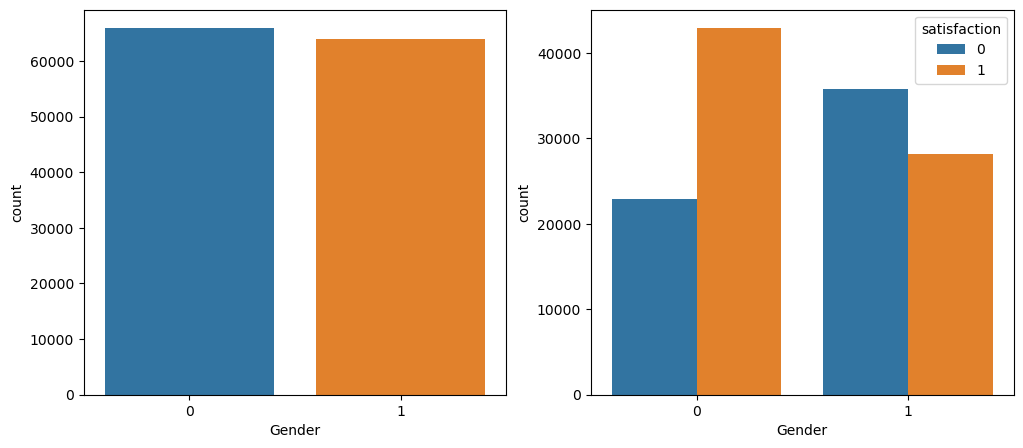

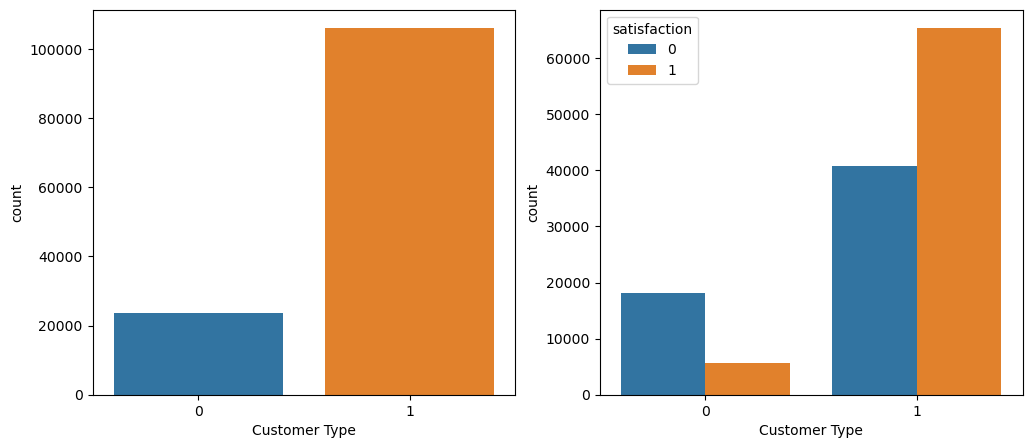

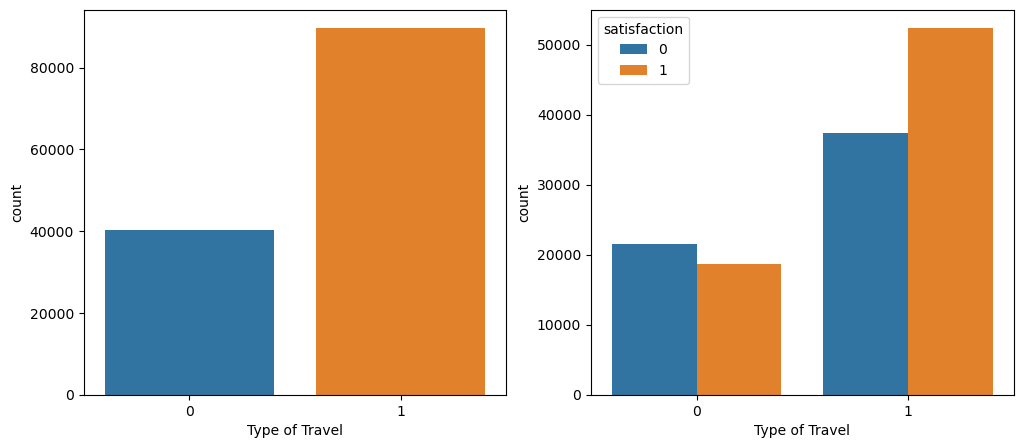

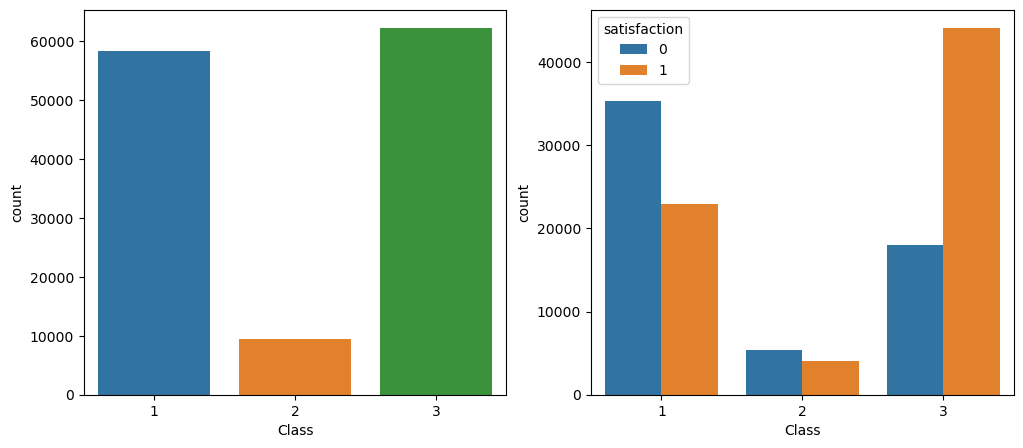

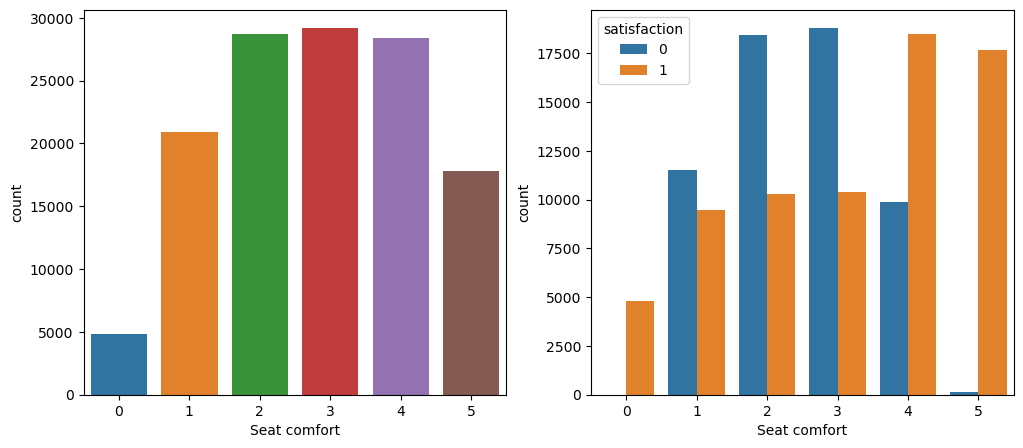

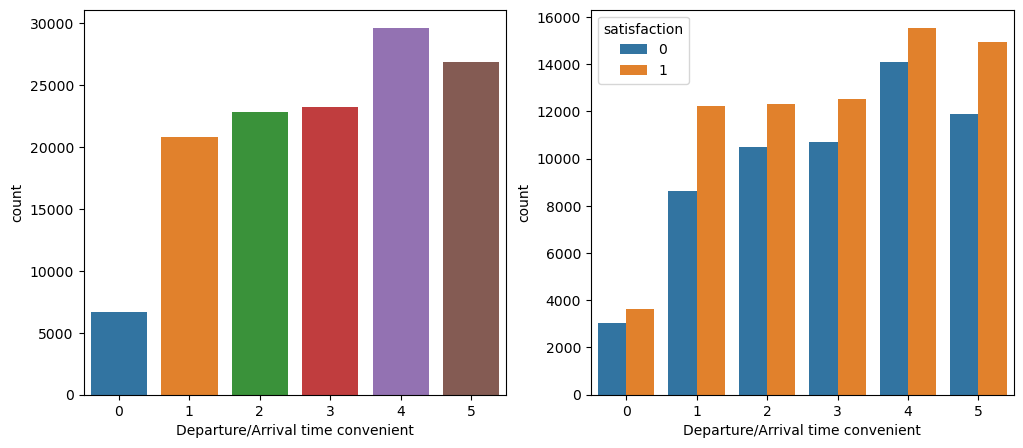

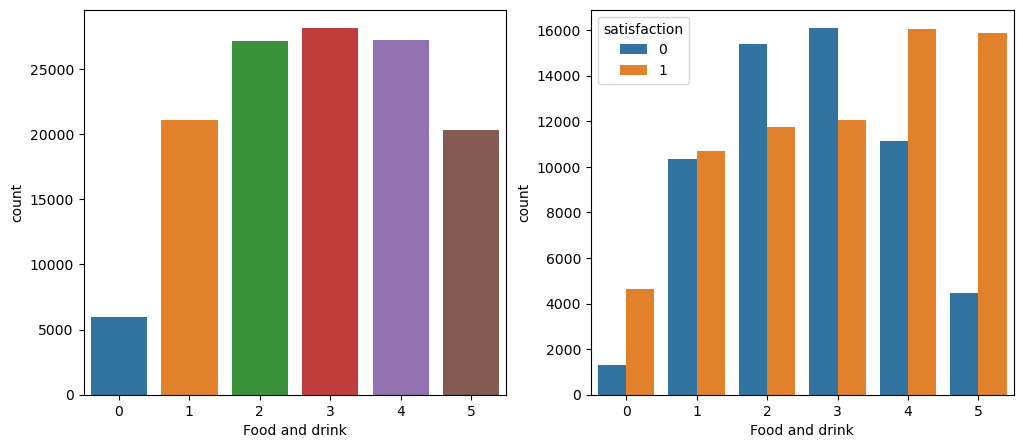

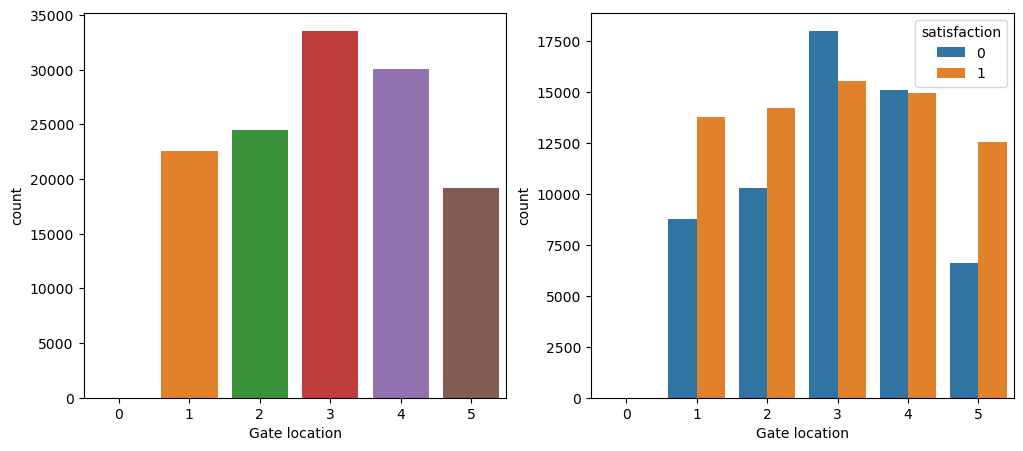

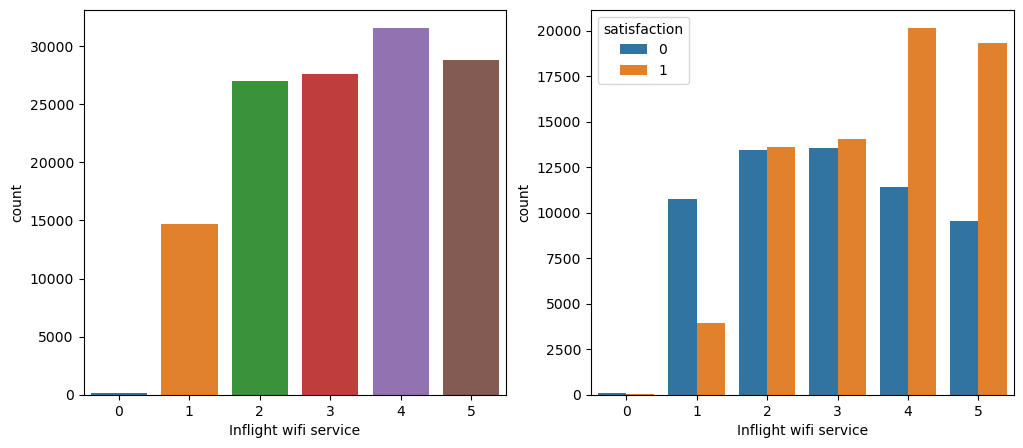

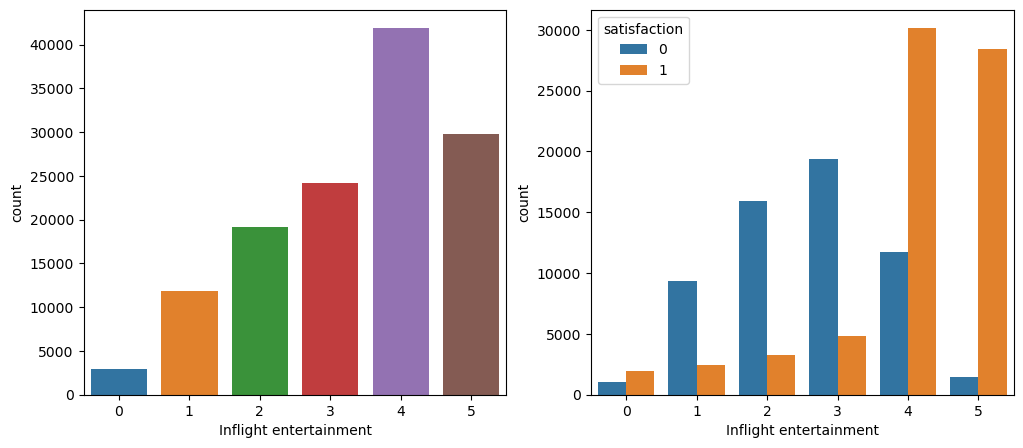

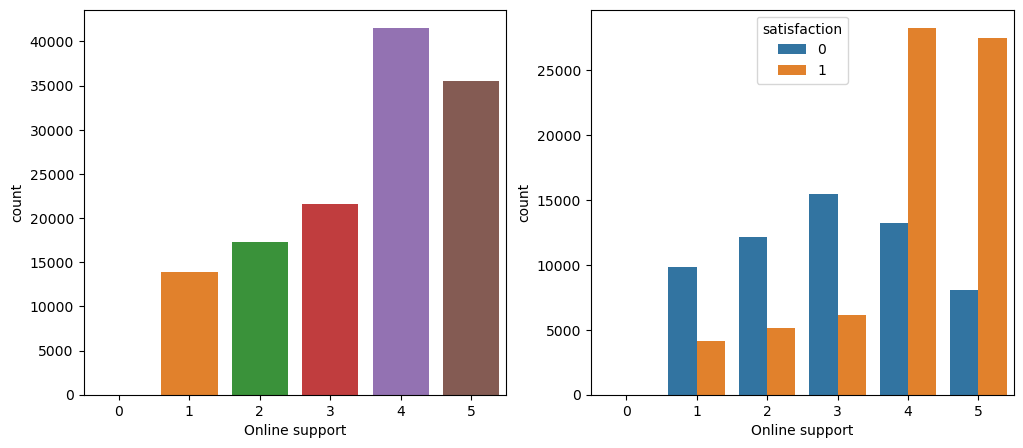

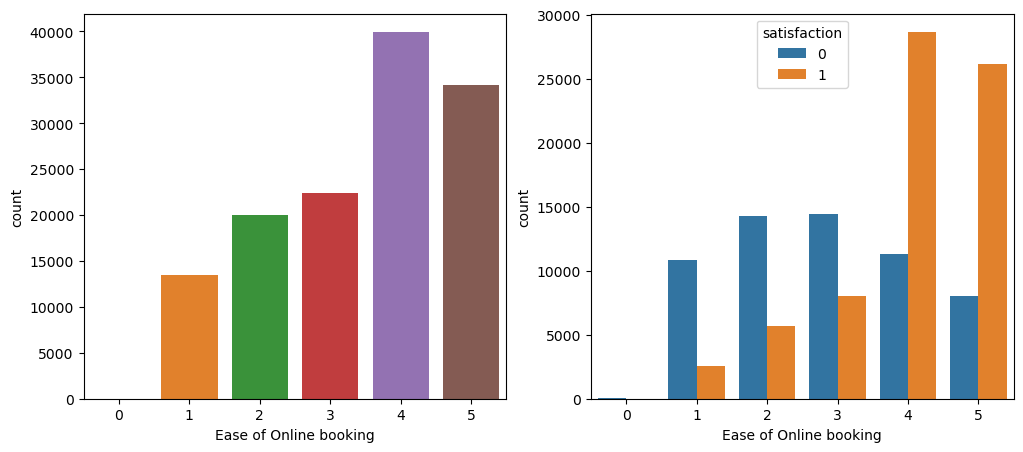

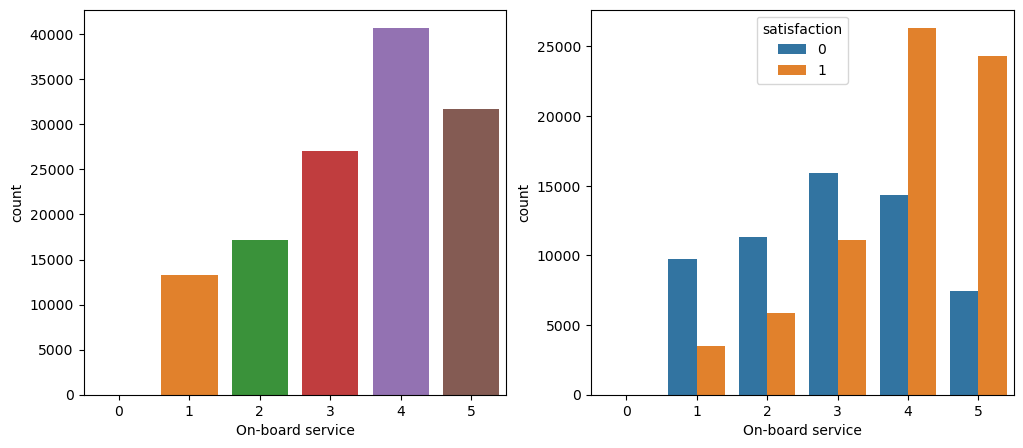

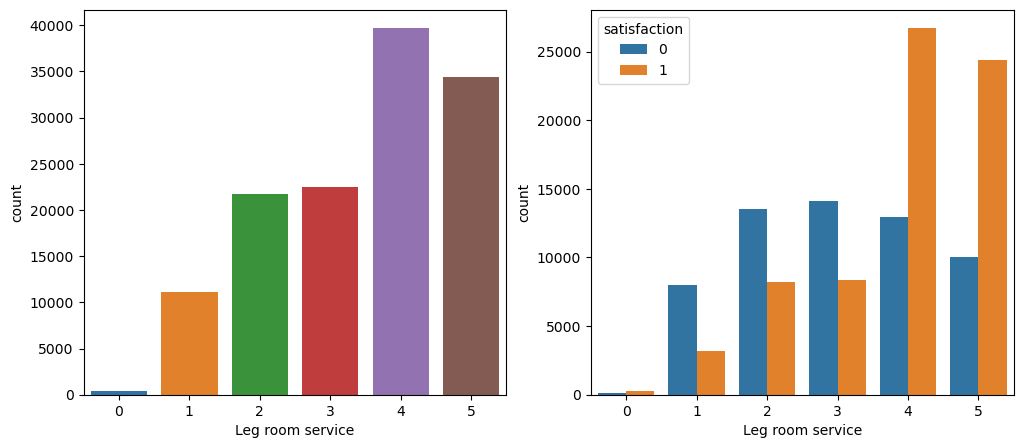

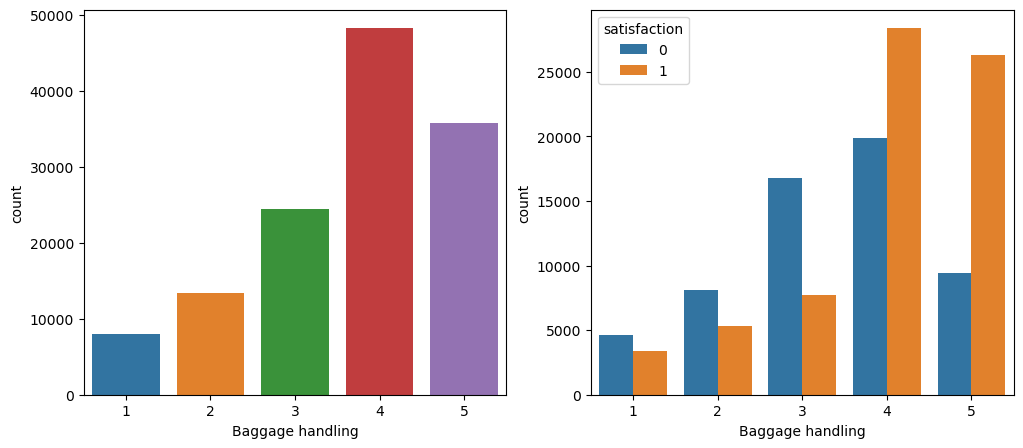

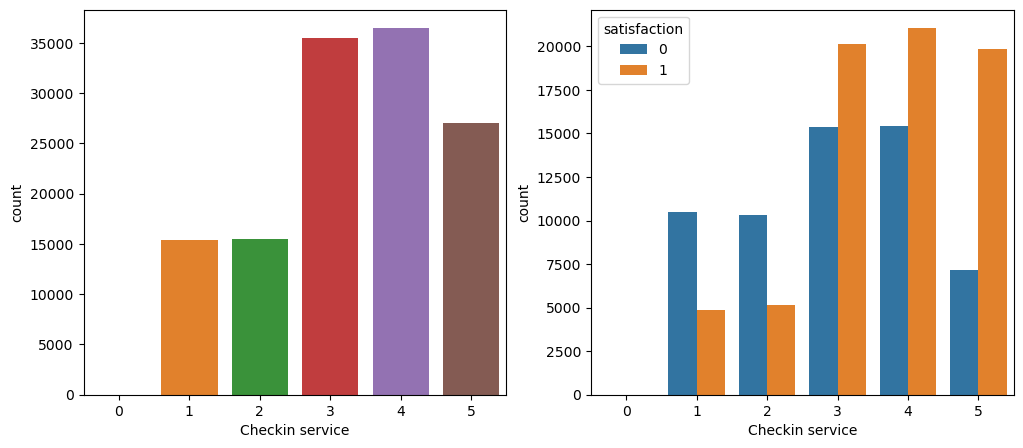

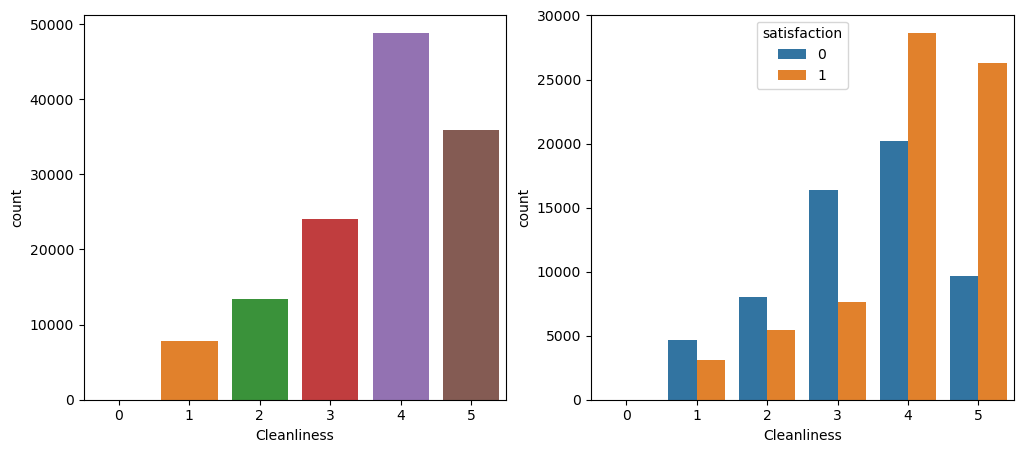

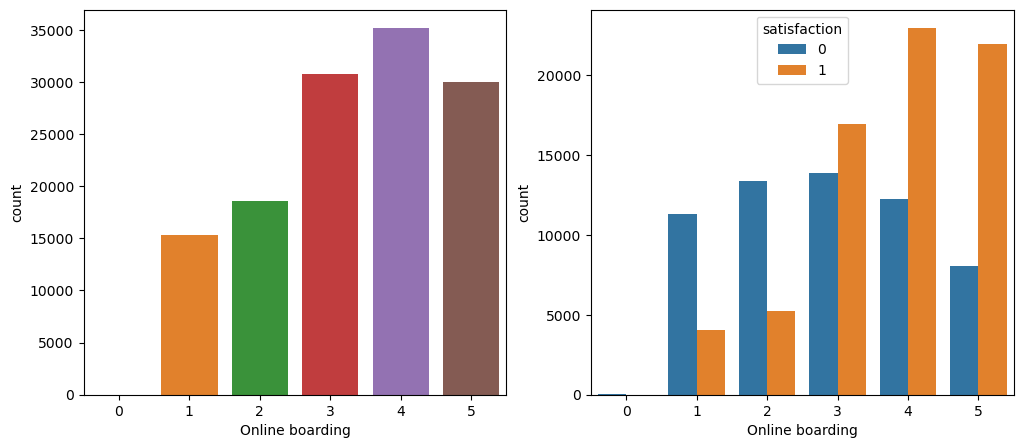

In [37]:
for col in category_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=col, data=train, ax=axes[0])
    sns.countplot(x=col, hue='satisfaction', data=train, ax=axes[1])

<AxesSubplot:xlabel='Age', ylabel='Count'>

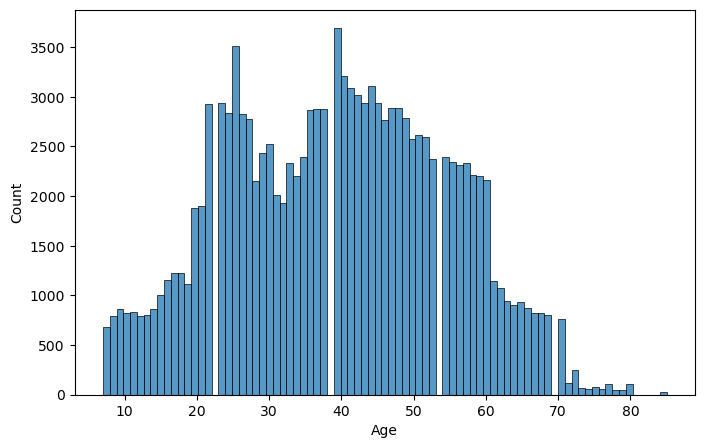

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train, x='Age')

<AxesSubplot:xlabel='Age', ylabel='Density'>

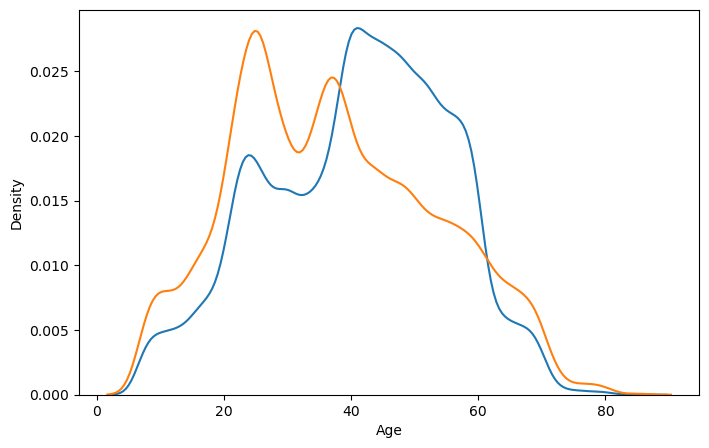

In [46]:
plt.figure(figsize=(8, 5))
sat = train[train['satisfaction']==1]
not_sat = train[train['satisfaction']==0]

sns.distplot(sat['Age'], hist=False)
sns.distplot(not_sat['Age'], hist=False)

In [47]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)

IQR = Q3 - Q1
IQR

satisfaction                            1.0
Gender                                  1.0
Customer Type                           0.0
Age                                    24.0
Type of Travel                          1.0
Class                                   2.0
Flight Distance                      1185.0
Seat comfort                            2.0
Departure/Arrival time convenient       2.0
Food and drink                          2.0
Gate location                           2.0
Inflight wifi service                   2.0
Inflight entertainment                  2.0
Online support                          2.0
Ease of Online booking                  3.0
On-board service                        1.0
Leg room service                        3.0
Baggage handling                        2.0
Checkin service                         1.0
Cleanliness                             2.0
Online boarding                         2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes        

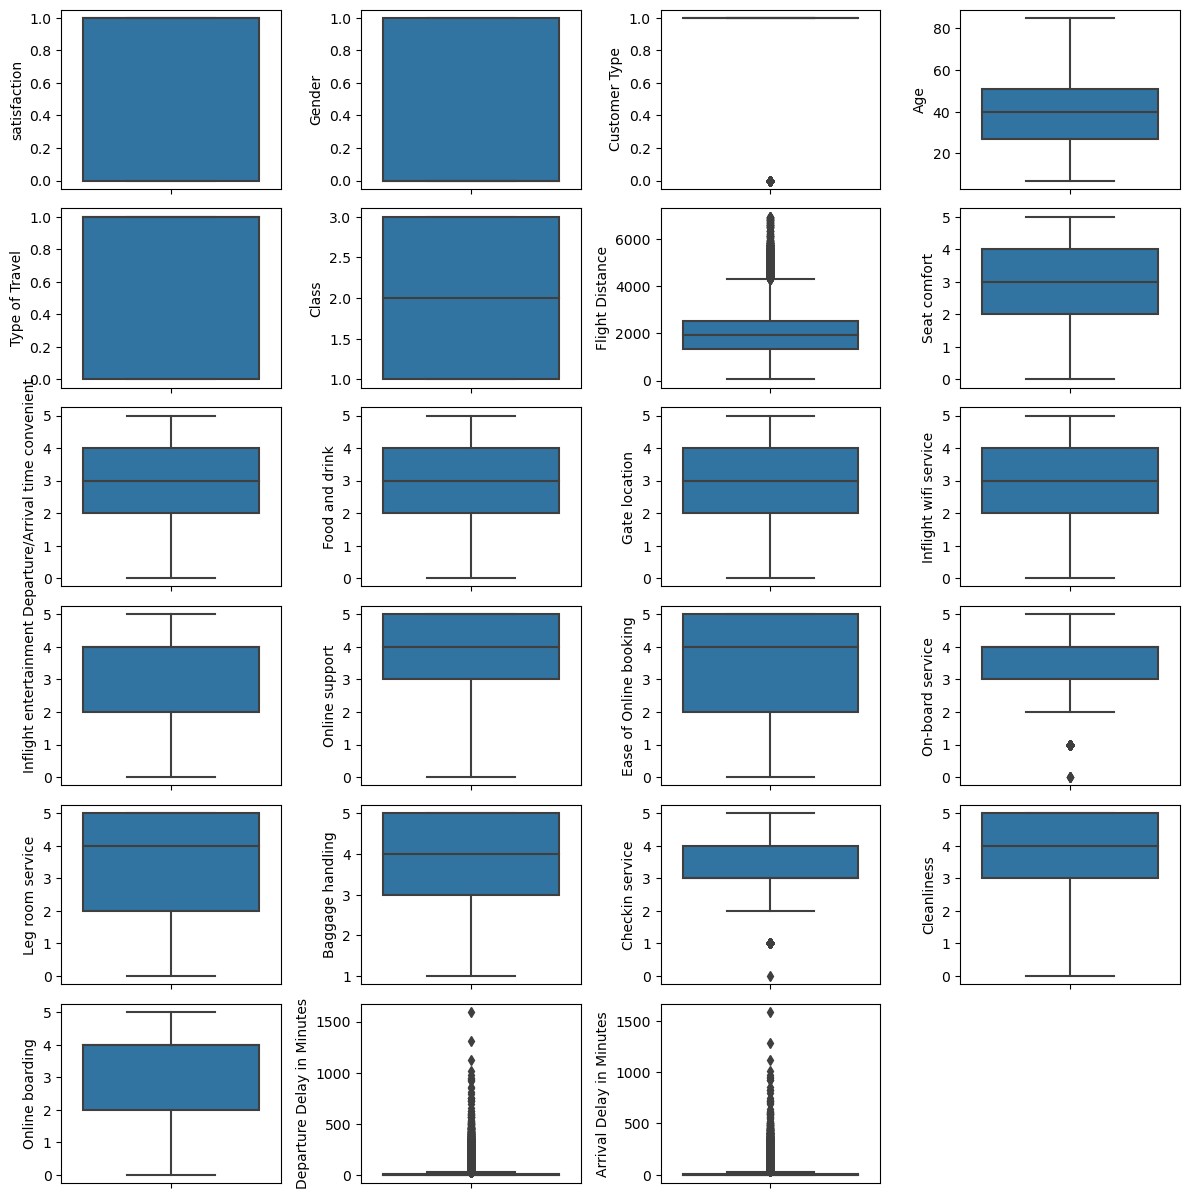

In [49]:
fig = plt.figure(figsize=(12, 18))
for i in range(len(train.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=train.iloc[:, i])

plt.tight_layout()

In [77]:
from collections import Counter

def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)

        IQR = Q3 - Q1
        outlier_step = IQR * 1.5

        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outliers_indices.items() if v>2 )
    return multiple_outliers


In [78]:
train.loc[detect_outliers(train,['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service','Leg room service',
       'Baggage handling', 'Checkin service',
       'Cleanliness', 'Departure Delay in Minutes'])]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
7239,0,0,1,55,0,1,4338,1,5,1,...,4,1,1,4,5,4,4,4,176,160.0
21607,0,1,1,36,0,1,4438,3,2,3,...,3,1,1,4,3,3,4,3,122,184.0
22092,0,0,1,58,0,2,5945,3,2,3,...,5,3,1,3,3,5,2,5,60,54.0
22692,0,0,1,64,0,1,5603,3,3,3,...,1,2,2,2,2,1,5,1,358,369.0
23003,0,1,1,69,0,1,4692,3,3,3,...,3,4,1,3,4,3,2,3,181,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123424,1,0,1,38,1,2,1456,5,1,1,...,5,5,1,1,5,1,2,5,41,82.0
123567,1,1,1,36,1,1,1703,5,4,4,...,5,5,1,5,4,1,3,5,64,57.0
127460,1,0,1,32,1,3,4041,4,1,4,...,5,5,1,4,4,1,3,5,34,26.0
128995,1,1,1,40,1,1,1938,5,2,3,...,5,5,1,3,4,1,4,5,105,98.0


In [79]:
train = train.drop(detect_outliers(train, ['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service','Leg room service',
       'Baggage handling', 'Checkin service',
       'Cleanliness', 'Departure Delay in Minutes']), axis=0).reset_index(drop=True)

In [80]:
train.describe()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,...,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000,129234.000000
mean,0.549159,0.492564,0.817037,39.450524,0.689888,2.029334,1976.923526,2.840731,2.991357,2.851827,...,3.523678,3.476206,3.476353,3.488966,3.699127,3.351332,3.709922,3.355967,14.373779,14.721575
std,0.497579,0.499947,0.386637,15.116478,0.462541,0.962667,1022.200059,1.393463,1.527884,1.444019,...,1.305228,1.304123,1.262858,1.290936,1.155523,1.253763,1.150043,1.297664,37.420410,37.775062
min,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,27.000000,0.000000,1.000000,1357.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,40.000000,1.000000,2.000000,1923.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,51.000000,1.000000,3.000000,2540.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,3.000000,6951.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [81]:
X_test.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000
mean,0.491839,0.816523,39.516746,0.687558,2.026948,1970.384316,2.836156,2.979058,2.848437,2.993686,...,3.523175,3.473976,3.465699,3.488258,3.699992,3.331460,3.707345,3.358908,14.648560,15.018787
std,0.499943,0.387065,15.091499,0.463498,0.962335,1023.800420,1.394595,1.532134,1.447154,1.305780,...,1.301839,1.298143,1.267730,1.286555,1.152059,1.256025,1.144720,1.295864,36.478671,36.813009
min,0.000000,0.000000,7.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,1.000000,1349.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,40.000000,1.000000,2.000000,1916.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,3.000000,2532.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,1.000000,85.000000,1.000000,3.000000,6948.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,815.000000,822.000000


In [83]:
train = train.drop(columns='Arrival Delay in Minutes')

In [85]:
X = train.drop(columns='satisfaction')
Y = train['satisfaction']

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
pred = rf.predict(X_train)
acc = accuracy_score(Y_train, pred)

acc

1.0

In [88]:
pred_test = rf.predict(X_test)
acc = accuracy_score(Y_test, pred_test)
acc

0.9586025457499904

In [89]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard = StandardScaler()
minmax = MinMaxScaler()

X_train_std = standard.fit_transform(X_train)
X_test_std = standard.transform(X_test)

X_train_mm = minmax.fit_transform(X_train)
X_test_mm = minmax.transform(X_test)

In [90]:
rf_std = RandomForestClassifier()
rf_std.fit(X_train_std, Y_train)
pred = rf_std.predict(X_train_std)
acc = accuracy_score(Y_train, pred)

acc

1.0

In [91]:
rf_mm = RandomForestClassifier()
rf_mm.fit(X_train_mm, Y_train)
pred = rf_mm.predict(X_train_mm)
acc = accuracy_score(Y_train, pred)

acc

1.0

In [92]:
pred_std = rf_std.predict(X_test_std)
acc_std = accuracy_score(Y_test, pred_std)

pred_mm = rf_mm.predict(X_test_mm)
acc_mm = accuracy_score(Y_test, pred_mm)

print('ACC : ', format(acc_std, '.4f'), ', ', format(acc_mm, '.4f'))

ACC :  0.9578 ,  0.9574
